In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import zipfile

url = 'https://dh-abstracts.library.cmu.edu/downloads/dh_conferences_works.csv'
zipped = requests.get(url).content
fp = BytesIO(zipped)
csv = zipfile.ZipFile(fp, "r").open('dh_conferences_works.csv')

In [2]:
data = pd.read_csv(csv)
data.head()

,work_id,conference_label,conference_short_title,conference_theme_title,conference_year,conference_organizers,conference_series,conference_hosting_institutions,conference_city,conference_state,conference_country,conference_url,work_title,work_url,work_authors,work_type,parent_work_id,keywords,languages,topics
0,1,2000 - Glasgow,Glasgow,NaN,2000,ACH;ALLC,ACH/ALLC;ACH/ICCH;ALLC/EADH,University of Glasgow,Glasgow,Scotland,United Kingdom,https://web.archive.org/web/20190421230852/htt...,Writing about It: Documentation and Humanities...,NaN,Julia Flanders,paper,NaN,NaN,English,NaN
1,2,2000 - Glasgow,Glasgow,NaN,2000,ACH;ALLC,ACH/ALLC;ACH/ICCH;ALLC/EADH,University of Glasgow,Glasgow,Scotland,United Kingdom,https://web.archive.org/web/20190421230852/htt...,Integration of Markup Languages and Object-Ori...,NaN,Antonio Navarro;Alfredo Fernandez-Valmayor;Bal...,paper,NaN,NaN,English,NaN
2,3,2000 - Glasgow,Glasgow,NaN,2000,ACH;ALLC,ACH/ALLC;ACH/ICCH;ALLC/EADH,University of Glasgow,Glasgow,Scotland,United Kingdom,https://web.archive.org/web/20190421230852/htt...,A Workbook Application for Digital Text Analysis,NaN,Worthy N. Martin;Olga Gurevich;Thomas B. Horto...,paper,NaN,NaN,English,NaN
3,4,2000 - Glasgow,Glasgow,NaN,2000,ACH;ALLC,ACH/ALLC;ACH/ICCH;ALLC/EADH,University of Glasgow,Glasgow,Scotland,United Kingdom,https://web.archive.org/web/20190421230852/htt...,The Middle English Grammar Project,NaN,Jeremy Smith;Simon Horobin,paper,7169.0,NaN,English,NaN
4,5,2000 - Glasgow,Glasgow,NaN,2000,ACH;ALLC,ACH/ALLC;ACH/ICCH;ALLC/EADH,University of Glasgow,Glasgow,Scotland,United Kingdom,https://web.archive.org/web/20190421230852/htt...,Two Historical Linguistic Atlases,NaN,Margaret Laing;Keith Williamson,paper,7169.0,NaN,English,NaN


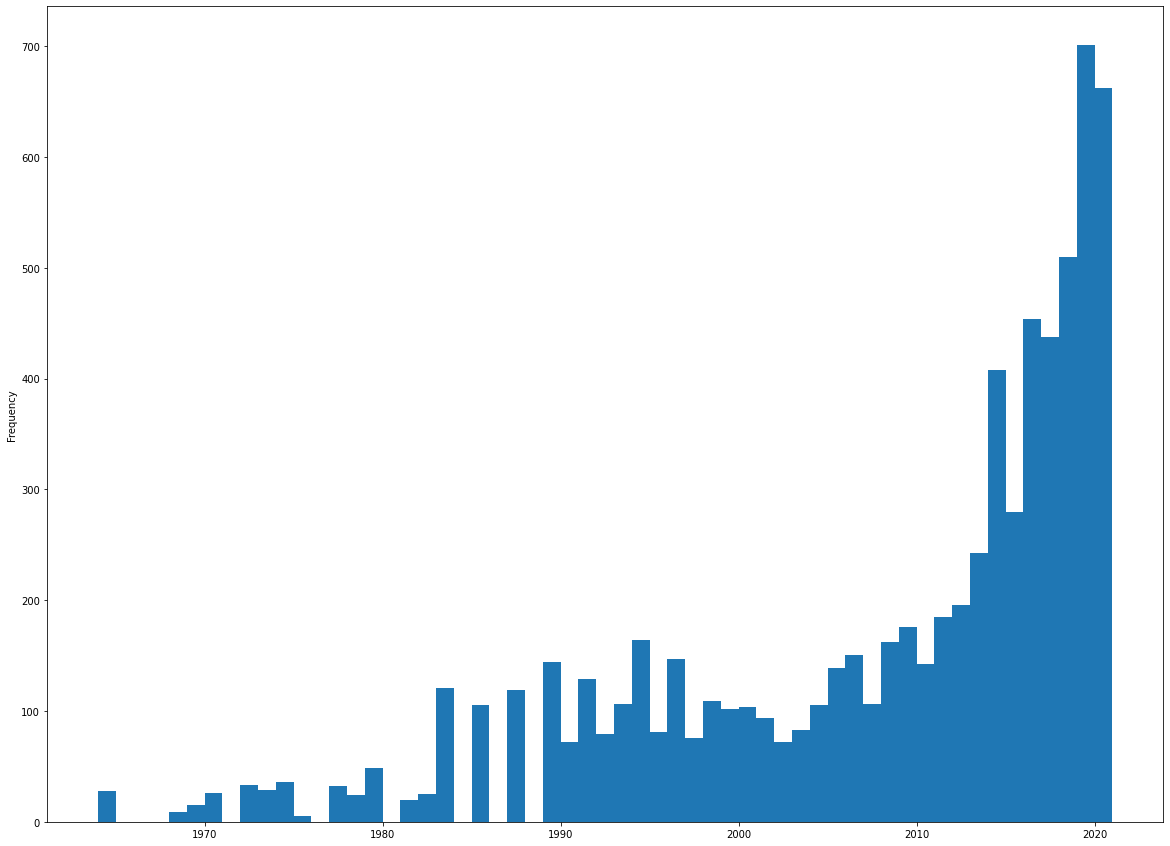

In [3]:
plt.figure(figsize=(20,15))
_ = data.conference_year.plot(
    kind='hist', 
    bins=data.conference_year.max()-data.conference_year.min()
)

In [4]:
all_keywords = [kw for ll in data.keywords[~data.keywords.isnull()].apply(
    lambda x: x.split(";")
) for kw in ll]

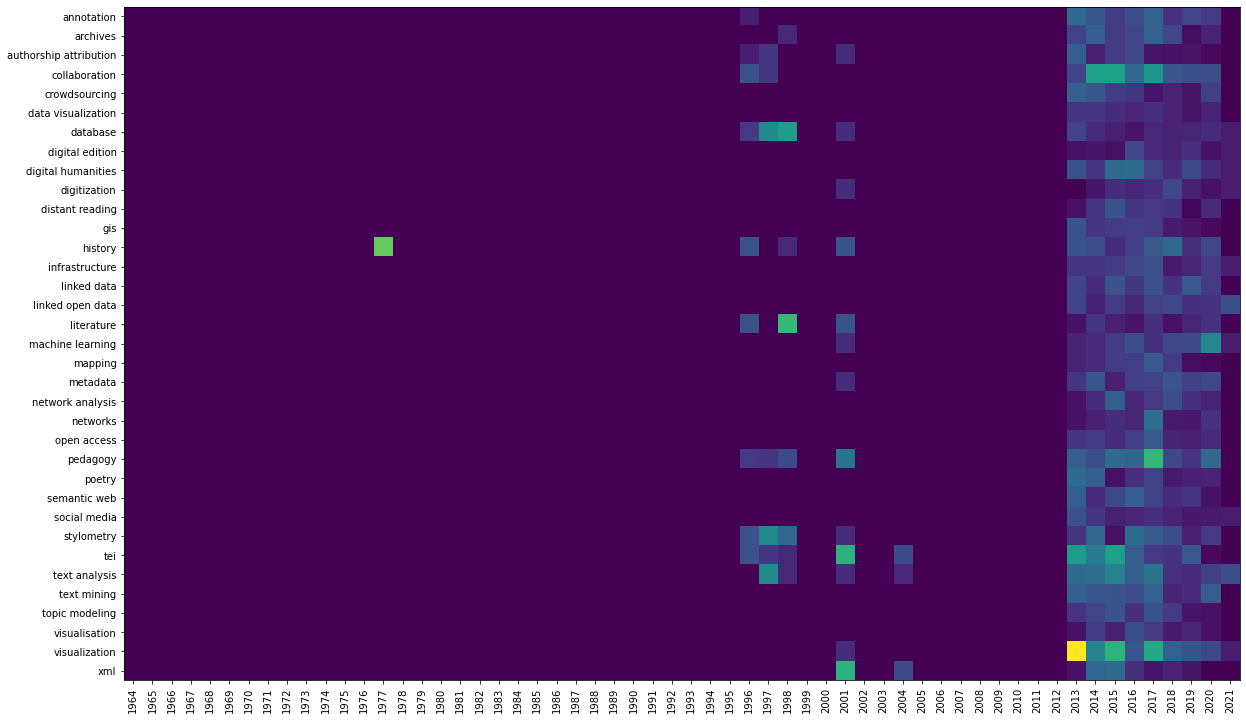

In [5]:
kw_index = sorted(list(set(all_keywords)))
year_index = list(range(data.conference_year.min(),data.conference_year.max()+1))
kw_by_year = np.zeros((len(kw_index), len(year_index)))

for _,row in data.iterrows():
    if isinstance(row.keywords, str):
        for keyword in row.keywords.split(";"):
            kw_by_year[
                kw_index.index(keyword),
                year_index.index(row.conference_year)
            ] += 1
            
filter_ = kw_by_year.sum(axis=1)>30

kw_index = list(np.array(kw_index)[filter_])
kw_by_year = kw_by_year[filter_]

cnt_rows_per_year = data.groupby('conference_year').count().work_id


min_year = cnt_rows_per_year.index.min()
max_year = cnt_rows_per_year.index.max()

cnt_rows_per_year_ = np.zeros(max_year+1-min_year)

for index, el in zip(cnt_rows_per_year.index, cnt_rows_per_year):
    cnt_rows_per_year_[index-min_year] = el


fig, ax = plt.subplots(1,1, figsize=(20,15))

with np.errstate(invalid='ignore'):
    kw_by_year = kw_by_year/cnt_rows_per_year_
    kw_by_year = np.nan_to_num(kw_by_year)

img = ax.imshow(kw_by_year)

ax.set_xticks(np.arange(len(year_index)))

ax.set_xticklabels(year_index, rotation=90)

ax.set_yticks(np.arange(len(kw_index)))

_ = ax.set_yticklabels(kw_index)